In [1]:
%run CAR_creation.ipynb
%run ../../main.py

import pyarc.qcba as qcba
from pyarc import CBA
from pyarc.qcba.data_structures import *
import pyarc.utils.plotting as plotils
import matplotlib.pyplot as plt

In [2]:
from pyarc.qcba import QCBA

In [3]:
import pandas as pd
from pyarc.qcba.data_structures import (
    IntervalReader,
    Interval,
    QuantitativeDataFrame,
    QuantitativeCAR
)

interval_reader = IntervalReader()

interval_reader.closed_bracket = "", "NULL"
interval_reader.open_bracket = "NULL", ""
interval_reader.infinity_symbol = "inf", "inf"
interval_reader.members_separator = "_to_"

interval_reader.compile_reader()

i = interval_reader.read("82.9815_to_inf")

QuantitativeCAR.interval_reader = interval_reader

In [4]:
rules

[CAR {a-list-celebrities=<0;2)} => {class=box-office-bomb} sup: 0.31 conf: 1.00 len: 2, id: 42,
 CAR {estimated-budget=<250;300)} => {class=main-stream-hit} sup: 0.06 conf: 1.00 len: 2, id: 4,
 CAR {estimated-budget=<0;50),a-list-celebrities=<4;6)} => {class=critical-success} sup: 0.06 conf: 1.00 len: 3, id: 24,
 CAR {a-list-celebrities=<6;8)} => {class=critical-success} sup: 0.03 conf: 1.00 len: 2, id: 1,
 CAR {a-list-celebrities=<4;6),estimated-budget=<100;150)} => {class=main-stream-hit} sup: 0.03 conf: 1.00 len: 3, id: 10,
 CAR {a-list-celebrities=<4;6),estimated-budget=<150;200)} => {class=main-stream-hit} sup: 0.03 conf: 1.00 len: 3, id: 16,
 CAR {estimated-budget=<200;250)} => {class=box-office-bomb} sup: 0.06 conf: 0.67 len: 2, id: 9,
 CAR {estimated-budget=<0;50)} => {class=box-office-bomb} sup: 0.14 conf: 0.62 len: 2, id: 29,
 CAR {a-list-celebrities=<4;6)} => {class=main-stream-hit} sup: 0.11 conf: 0.50 len: 2, id: 31]

In [5]:
ds = movies_train_undiscr
ds = ds.reset_index()
quant_dataset = QuantitativeDataFrame(ds)
Y = ds["class"]

In [6]:
dataset_name = "iris"
dataset_index = 1



train_path_undiscr = [ "C:/code/python/machine_learning/assoc_rules/folds_undiscr/train/{}{}.csv".format(dataset_name, dataset_index) for dataset_index in range(0, 9)] 
test_path_undiscr = [ "C:/code/python/machine_learning/assoc_rules/folds_undiscr/test/{}{}.csv".format(dataset_name, dataset_index) for dataset_index in range(0, 9)]

train_path_discr = [ "C:/code/python/machine_learning/assoc_rules/train/{}{}.csv".format(dataset_name, dataset_index) for dataset_index in range(0, 9)]
test_path_discr = [ "C:/code/python/machine_learning/assoc_rules/test/{}{}.csv".format(dataset_name, dataset_index) for dataset_index in range(0, 9)]

dataset_train_undiscr = pd.concat([ pd.read_csv(ds) for ds in train_path_undiscr ])
dataset_test_undiscr = pd.concat([ pd.read_csv(ds) for ds in test_path_undiscr ])
dataset_test_undiscr_Y = dataset_test_undiscr.iloc[:,-1]

quant_dataset_train = QuantitativeDataFrame(dataset_train_undiscr)
quant_dataset_test = QuantitativeDataFrame(dataset_test_undiscr)

txns_train_discr = TransactionDB.from_DataFrame(pd.concat([pd.read_csv(ds) for ds in train_path_discr]))
txns_test_discr = TransactionDB.from_DataFrame(pd.concat([pd.read_csv(ds) for ds in test_path_discr]))

rm_cba = CBA(algorithm="m1", confidence=0.1, support=0.01).fit(txns_train_discr, top_rules_args={"target_rule_count":1000})

rm_qcba = QCBA(rm_cba, quant_dataset_train)
rm_qcba.fit(
    refitting=True,
    literal_pruning=True,
    trimming=True,
    extension=True,
    overlap_pruning=True,
    transaction_based_drop=True
)


rm_qcba.clf.rule_model_accuracy(quant_dataset_test, dataset_test_undiscr_Y), rm_cba.rule_model_accuracy(txns_test_discr)

Running apriori with setting: confidence=0.5, support=0.0, minlen=2, maxlen=3, MAX_RULE_LEN=5
Rule count: 403, Iteration: 1
Increasing maxlen 4
Running apriori with setting: confidence=0.5, support=0.0, minlen=2, maxlen=4, MAX_RULE_LEN=5
Rule count: 809, Iteration: 2
Increasing maxlen 5
Running apriori with setting: confidence=0.5, support=0.0, minlen=2, maxlen=5, MAX_RULE_LEN=5
Rule count: 952, Iteration: 3
Decreasing confidence to 0.45
Running apriori with setting: confidence=0.45, support=0.0, minlen=2, maxlen=5, MAX_RULE_LEN=5
Rule count: 952, Iteration: 4
Decreasing confidence to 0.4
Running apriori with setting: confidence=0.4, support=0.0, minlen=2, maxlen=5, MAX_RULE_LEN=5
Rule count: 952, Iteration: 5
Decreasing confidence to 0.35000000000000003
Running apriori with setting: confidence=0.35000000000000003, support=0.0, minlen=2, maxlen=5, MAX_RULE_LEN=5
Rule count: 952, Iteration: 6
Decreasing confidence to 0.30000000000000004
Running apriori with setting: confidence=0.3000000

(0.9851851851851852, 0.8962962962962963)

In [7]:
interval_reader = IntervalReader()

interval_reader.closed_bracket = "", "NULL"
interval_reader.open_bracket = "NULL", ""
interval_reader.infinity_symbol = "inf", "inf"
interval_reader.members_separator = "_to_"

interval_reader.compile_reader()

i = interval_reader.read("82.9815_to_inf")

In [8]:
from pyarc.qcba.transformation import QCBATransformation

dataset_name = "iris"
dataset_index = 1



train_path_undiscr = [ "C:/code/python/machine_learning/assoc_rules/folds_undiscr/train/{}{}.csv".format(dataset_name, dataset_index) for dataset_index in range(0, 9)] 
test_path_undiscr = [ "C:/code/python/machine_learning/assoc_rules/folds_undiscr/test/{}{}.csv".format(dataset_name, dataset_index) for dataset_index in range(0, 9)]

train_path_discr = [ "C:/code/python/machine_learning/assoc_rules/train/{}{}.csv".format(dataset_name, dataset_index) for dataset_index in range(0, 9)]
test_path_discr = [ "C:/code/python/machine_learning/assoc_rules/test/{}{}.csv".format(dataset_name, dataset_index) for dataset_index in range(0, 9)]

dataset_train_undiscr = pd.concat([ pd.read_csv(ds) for ds in train_path_undiscr ])
dataset_test_undiscr = pd.concat([ pd.read_csv(ds) for ds in test_path_undiscr ])
dataset_test_undiscr_Y = dataset_test_undiscr.iloc[:,-1]

quant_dataset_train = QuantitativeDataFrame(dataset_train_undiscr)
quant_dataset_test = QuantitativeDataFrame(dataset_test_undiscr)

txns_train_discr = TransactionDB.from_DataFrame(pd.concat([pd.read_csv(ds) for ds in train_path_discr]))
txns_test_discr = TransactionDB.from_DataFrame(pd.concat([pd.read_csv(ds) for ds in test_path_discr]))

rm_cba = CBA(algorithm="m1", confidence=0.1, support=0.01).fit(txns_train_discr, top_rules_args={"target_rule_count":1000})

cba_rule_model = rm_cba
quantitative_dataset = quant_dataset

__quant_rules = [ QuantitativeCAR(r) for r in cba_rule_model.clf.rules ] 

qcba_transformation = QCBATransformation(quant_dataset_train)


refitting=True,
literal_pruning=True,
trimming=True,
extension=True,
overlap_pruning=True,
transaction_based_drop=True

transformation_dict = {
    "refitting": refitting,
    "literal_pruning": literal_pruning,
    "trimming": trimming,
    "extension": extension,
    "overlap_pruning": overlap_pruning,
    "transaction_based_drop": transaction_based_drop
}





Running apriori with setting: confidence=0.5, support=0.0, minlen=2, maxlen=3, MAX_RULE_LEN=5
Rule count: 403, Iteration: 1
Increasing maxlen 4
Running apriori with setting: confidence=0.5, support=0.0, minlen=2, maxlen=4, MAX_RULE_LEN=5
Rule count: 809, Iteration: 2
Increasing maxlen 5
Running apriori with setting: confidence=0.5, support=0.0, minlen=2, maxlen=5, MAX_RULE_LEN=5
Rule count: 952, Iteration: 3
Decreasing confidence to 0.45
Running apriori with setting: confidence=0.45, support=0.0, minlen=2, maxlen=5, MAX_RULE_LEN=5
Rule count: 952, Iteration: 4
Decreasing confidence to 0.4
Running apriori with setting: confidence=0.4, support=0.0, minlen=2, maxlen=5, MAX_RULE_LEN=5
Rule count: 952, Iteration: 5
Decreasing confidence to 0.35000000000000003
Running apriori with setting: confidence=0.35000000000000003, support=0.0, minlen=2, maxlen=5, MAX_RULE_LEN=5
Rule count: 952, Iteration: 6
Decreasing confidence to 0.30000000000000004
Running apriori with setting: confidence=0.3000000

In [9]:
class RulePostPruner:
    
    def __init__(self, quantitative_dataset):
        self.__dataframe = quantitative_dataset
        
        
    def transform(self, rules):
        copied_rules = [ rule.copy() for rule in rules ]

        pruned_rules = self.prune(copied_rules)
        
        return pruned_rules
        
    def preprocess_dataframe(self):
        return self.__dataframe.dataframe.index.values
        
        
        
        
    def get_most_frequent_class(self):
        """ 
        requires class column to be the last in dataframe
        
        gets the most frequent class from dataset
        - naive implementation
        """
        
        index_counts, possible_classes = pd.factorize(self.__dataframe.dataframe.iloc[:, -1].values)
        counts = np.bincount(index_counts)
        counts_max = counts.max()
        most_frequent_classes = possible_classes[counts == counts_max]
        
        # return only one
        return most_frequent_classes[0], counts_max
    
    
    def get_most_frequent_from_numpy(self, ndarray):
        """gets a mode from numpy array
        """
        unique, pos = np.unique(ndarray, return_inverse=True) 
        counts = np.bincount(pos)                  
        maxpos = counts.argmax()                      

        return (unique[maxpos], counts[maxpos])
        
    
    def find_covered(self):
        pass
        
        
    def prune(self, rules):
        
        dataset = self.preprocess_dataframe()
        dataset_len = dataset.size
        # True if datacase is not covered yet
        dataset_mask = [ True ] * dataset_len
        
        cutoff_rule = rules[-1]
        cutoff_class, cutoff_class_count = self.get_most_frequent_class()
        
        default_class = cutoff_class

        total_errors_without_default = 0
        
        lowest_total_error = dataset_len - cutoff_class_count
        
        # implement comparators
        rules.sort(reverse=True)
        
        k = 0
        for rule in rules:
            print("current rule idx", k)
            k += 1
            print(rule)
            covered_antecedent, covered_consequent = self.__dataframe.find_covered_by_rule_mask(rule)

            
            # dataset -= covered_antecedent
            #dataset_mask = dataset_mask & np.logical_not(covered_antecedent)

            correctly_covered = covered_antecedent & covered_consequent
            
            #print("correctly covered from mask", np.sum(correctly_covered & dataset_mask))
            
            if not any(correctly_covered):
                rules.remove(rule)
            else:
                misclassified = np.sum(covered_antecedent & dataset_mask) - np.sum(correctly_covered & dataset_mask)
                
                total_errors_without_default += misclassified
                
                # dataset -= covered_antecedent
                #dataset_mask = np.logical_not(dataset_mask & covered_antecedent)
                dataset_mask = dataset_mask & np.logical_not(covered_antecedent)

                modified_dataset = dataset[dataset_mask]
                class_values = self.__dataframe.dataframe.iloc[:,-1][dataset_mask].values
                
                
                default_class, default_class_count = self.__dataframe.dataframe.iloc[1,-1], 0
                
                if len(class_values) > 0:
                    default_class, default_class_count = self.get_most_frequent_from_numpy(class_values)
                
                # don't forget to update dataset length
                default_rule_error = np.sum(dataset_mask) - default_class_count
                total_errors_with_default = default_rule_error + total_errors_without_default
                
   
                
                if total_errors_with_default < lowest_total_error:
                    cutoff_rule = rule
                    lowest_total_error = total_errors_with_default
                    cutoff_class = default_class
        


  
        
        # remove all rules below cutoff rule
        index_to_cut = rules.index(cutoff_rule)
        rules_pruned = rules[:index_to_cut+1]
        
        # append new default rule
        empty_rule = cutoff_rule.copy()
        empty_rule.antecedent = []
        empty_rule.consequent = self.__dataframe.dataframe.columns[-1], cutoff_class
        
        
        #rules_pruned.append(empty_rule)
        
        return rules_pruned, cutoff_class

post_pruner = RulePostPruner(quant_dataset_train)
    
refitted = qcba_transformation.refitter.transform(__quant_rules)
literal_pruned = qcba_transformation.literal_pruner.transform(refitted)
trimmed = qcba_transformation.trimmer.transform(literal_pruned)
extended = qcba_transformation.extender.transform(trimmed)
post_pruned, default_class = post_pruner.transform(extended)
overlap_pruned = qcba_transformation.overlap_pruner.transform(post_pruned, default_class, transaction_based=transaction_based_drop)

post_pruned

[                                                  ]
[#                                                 ]
[###                                               ]
[#####                                             ]
[######                                            ]
[########                                          ]
[##########                                        ]
[############                                      ]
[#############                                     ]
[###############                                   ]
[#################                                 ]
[##################                                ]
[####################                              ]
[######################                            ]
[########################                          ]
[#########################                         ]
[###########################                       ]
[#############################                     ]
[###############################              

[CAR {petalwidth=<0.1;0.6>} => {class=Iris-setosa} sup: 0.33 conf: 1.00 len: 2, id: 1009,
 CAR {petallength=<1.0;1.9>} => {class=Iris-setosa} sup: 0.33 conf: 1.00 len: 2, id: 1013,
 CAR {petallength=<3.0;4.9>,petalwidth=<1.0;1.6>} => {class=Iris-versicolor} sup: 0.31 conf: 1.00 len: 3, id: 1796,
 CAR {petallength=<3.0;4.9>,petalwidth=<1.0;1.6>,sepallength=<4.9;7.2>} => {class=Iris-versicolor} sup: 0.31 conf: 1.00 len: 4, id: 1376,
 CAR {petallength=<3.0;4.9>,petalwidth=<1.0;1.6>,sepallength=<4.3;7.0>} => {class=Iris-versicolor} sup: 0.31 conf: 1.00 len: 4, id: 1483,
 CAR {petallength=<3.0;4.7>,sepallength=<5.0;7.1>} => {class=Iris-versicolor} sup: 0.29 conf: 1.00 len: 3, id: 1081,
 CAR {petallength=<3.0;4.7>,sepallength=<5.0;7.3>} => {class=Iris-versicolor} sup: 0.29 conf: 1.00 len: 3, id: 1188,
 CAR {petallength=<3.0;4.7>,sepallength=<5.0;7.3>} => {class=Iris-versicolor} sup: 0.29 conf: 1.00 len: 3, id: 1249,
 CAR {petallength=<3.0;4.7>,sepallength=<5.0;7.2>} => {class=Iris-versicolor

In [10]:
quant_dataset_train._QuantitativeDataFrame__dataframe.iloc[1,-1]

'Iris-setosa'

In [11]:
program_script = """
dataset_name = "segment"
dataset_index = 1

train_path_undiscr = "C:/code/python/machine_learning/assoc_rules/folds_undiscr/train/{}{}.csv".format(dataset_name, dataset_index) 
test_path_undiscr = "C:/code/python/machine_learning/assoc_rules/folds_undiscr/test/{}{}.csv".format(dataset_name, dataset_index)

train_path_discr = "C:/code/python/machine_learning/assoc_rules/train/{}{}.csv".format(dataset_name, dataset_index)
test_path_discr = "C:/code/python/machine_learning/assoc_rules/test/{}{}.csv".format(dataset_name, dataset_index)

dataset_train_undiscr = pd.read_csv(train_path_undiscr)
dataset_test_undiscr = pd.read_csv(test_path_undiscr)
dataset_test_undiscr_Y = dataset_test_undiscr.iloc[:,-1]

quant_dataset_train = QuantitativeDataFrame(dataset_train_undiscr)
quant_dataset_test = QuantitativeDataFrame(dataset_test_undiscr)

txns_train_discr = TransactionDB.from_DataFrame(pd.read_csv(train_path_discr))
txns_test_discr = TransactionDB.from_DataFrame(pd.read_csv(test_path_discr))

rm_cba = CBA(algorithm="m1", confidence=0.6, support=0.20).fit(txns_train_discr, top_rules_args={"target_rule_count":1000})

rm_qcba = QCBA(rm_cba, quant_dataset_train)
rm_qcba.fit(
    refitting=False,
    literal_pruning=False,
    trimming=False,
    extension=True,
    overlap_pruning=False,
    transaction_based_drop=False
)


rm_qcba.clf.rule_model_accuracy(quant_dataset_test, dataset_test_undiscr_Y), rm_cba.rule_model_accuracy(txns_test_discr)
"""

In [12]:
import cProfile

cProfile.run(program_script)

Running apriori with setting: confidence=0.5, support=0.0, minlen=2, maxlen=3, MAX_RULE_LEN=20
Rule count: 22000, Iteration: 1
Target rule count satisfied: 1000
applying selected transformations
extending
[                                                  ]
[#                                                 ]
[##                                                ]
[###                                               ]
[####                                              ]
[#####                                             ]
[######                                            ]
[#######                                           ]
[########                                          ]
[#########                                         ]
[##########                                        ]
[###########                                       ]
[############                                      ]
[#############                                     ]
[##############                                    ]


   295051    0.144    0.000    0.452    0.000 car.py:105(__lt__)
    22000    0.134    0.000    0.291    0.000 car.py:64(__init__)
   295051    0.308    0.000    0.308    0.000 car.py:82(__gt__)
        2    0.000    0.000    0.000    0.000 cast.py:1006(<genexpr>)
        3    0.000    0.000    0.000    0.000 cast.py:1009(<genexpr>)
        2    0.000    0.000    0.000    0.000 cast.py:1013(<genexpr>)
        2    0.000    0.000    0.000    0.000 cast.py:1015(<genexpr>)
        3    0.000    0.000    0.000    0.000 cast.py:1020(<genexpr>)
  1212572   17.277    0.000   50.727    0.000 cast.py:251(maybe_promote)
      311    0.001    0.000    0.001    0.000 cast.py:759(maybe_castable)
      273    0.003    0.000    0.010    0.000 cast.py:771(maybe_infer_to_datetimelike)
      273    0.003    0.000    0.015    0.000 cast.py:868(maybe_cast_to_datetime)
        1    0.000    0.000    0.000    0.000 cast.py:981(find_common_type)
        1    0.000    0.000    0.000    0.000 classification.py

       38    0.000    0.000    0.000    0.000 internals.py:4445(<lambda>)
        6    0.001    0.000    0.002    0.000 internals.py:4473(_stack_arrays)
       80    0.000    0.000    0.001    0.000 internals.py:4476(_asarray_compat)
        6    0.000    0.000    0.000    0.000 internals.py:4482(_shape_compat)
        1    0.000    0.000    0.000    0.000 internals.py:4500(_interleaved_dtype)
        1    0.000    0.000    0.000    0.000 internals.py:4504(<listcomp>)
   606866    3.518    0.000    5.743    0.000 internals.py:4665(_get_blkno_placements)
   303433    1.731    0.000    3.549    0.000 internals.py:5257(_preprocess_slice_or_indexer)
110342277   37.244    0.000   37.244    0.000 interval.py:14(greaterthan)
 82346341   26.255    0.000   26.255    0.000 interval.py:21(lesserthan)
    90735    0.726    0.000    2.242    0.000 interval.py:31(__init__)
   106134    0.165    0.000    1.799    0.000 interval.py:46(__hash__)
    53067    0.102    0.000    2.078    0.000 interval.py

     5214    0.002    0.000    0.002    0.000 {built-in method nt.getpid}
     5266    0.006    0.000    0.006    0.000 {built-in method nt.urandom}
   909151    4.115    0.000    4.115    0.000 {built-in method numpy.core.multiarray.arange}
5291975/5291972   44.085    0.000   44.085    0.000 {built-in method numpy.core.multiarray.array}
      201    0.001    0.000    0.001    0.000 {built-in method numpy.core.multiarray.bincount}
      200    0.002    0.000    0.002    0.000 {built-in method numpy.core.multiarray.concatenate}
  2729035   13.927    0.000   13.927    0.000 {built-in method numpy.core.multiarray.empty}
    51471    0.523    0.000    0.523    0.000 {built-in method numpy.core.multiarray.where}
        1    0.000    0.000    0.000    0.000 {built-in method numpy.core.multiarray.zeros}
    84057    0.604    0.000    0.604    0.000 {built-in method numpy.core.umath.frompyfunc}
  1819438    1.931    0.000    1.931    0.000 {built-in method pandas._libs.algos.ensure_int64}
   

In [13]:
len(rm_qcba.clf.rules), len(rm_cba.clf.rules)

(200, 200)

In [46]:
import pandas
import numpy as np
import math

class RuleExtender1:
    
    def __init__(self, dataframe):
    
        if type(dataframe) != QuantitativeDataFrame:
            raise Exception(
                "type of dataset must be pandas.DataFrame"
            )
            
        self.__dataframe = dataframe
        
        
    def transform_greedy(self, rules, skip_ahead=1):
        
        copied_rules = [ rule.copy() for rule in rules ]

        progress_bar_len = 50
        copied_rules_len = len(copied_rules)
        progress_bar = "#" * progress_bar_len
        progress_bar_empty = " " * progress_bar_len
        last_progress_bar_idx = -1

        extended_rules = []

        #print("len: ", copied_rules_len)

        for i, rule in enumerate(copied_rules):
            current_progress_bar_idx = math.floor(i / copied_rules_len * progress_bar_len)
            
            if last_progress_bar_idx != current_progress_bar_idx:
                last_progress_bar_idx = current_progress_bar_idx
                
                progress_string = "[" + progress_bar[:last_progress_bar_idx] + progress_bar_empty[last_progress_bar_idx:] + "]"
                
                #print(*progress_string, sep="")

            extended_rules.append(self.__extend_greedy(rule, skip_ahead=skip_ahead))
        
        return extended_rules
    
    
        
    def __extend_greedy(self, rule, skip_ahead=1):
        ext = self.__extend_rule_greedy(rule, skip_ahead=skip_ahead)
        
        return ext
    
    
    def __extend_rule_greedy(self, rule, min_improvement=0, min_conditional_improvement=-0.01, skip_ahead=1):
        
        # check improvemnt argument ranges
        
        step = 0
        
        current_best = rule
        direct_extensions = self.__get_extensions_greedy(rule)
        
        current_best.update_properties(self.__dataframe)
        
        while True:
            extension_succesful = False

            direct_extensions = self.__get_extensions_greedy(current_best)

            #print("extending - new cycle")
            
            for candidate in direct_extensions:
                #print("\tcandidate - direct extensions")
                #print("\t", direct_extensions)
                candidate.update_properties(self.__dataframe)
                
                delta_confidence = candidate.confidence - current_best.confidence
                delta_support = candidate.support - current_best.support
                
                
                if self.__crisp_accept(delta_confidence, delta_support, min_improvement):
                    current_best = candidate
                    extension_succesful = True
                    break
                    
                
                if self.__conditional_accept(delta_confidence, min_conditional_improvement):
                    enlargement = candidate
                    
                    while True:
                        enlargement = self.get_beam_extensions_greedy(enlargement, skip_ahead=skip_ahead)
                        
                        if not enlargement:
                            break
                            
                        candidate.update_properties(self.__dataframe)
                        enlargement.update_properties(self.__dataframe)

                        delta_confidence = enlargement.confidence - current_best.confidence
                        delta_support = enlargement.support - current_best.support

                        if self.__crisp_accept(delta_confidence, delta_support, min_improvement):
                            current_best = enlargement
                            plotils.plot_quant_rules([current_best])
                            plt.show()
                            
                            print(step)
                            step += 1
                            
                            extension_succesful = True
                            
                        elif self.__conditional_accept(delta_confidence, min_conditional_improvement):
                            plotils.plot_quant_rules([enlargement])
                            plt.show()
                            
                            print(step)
                            step += 1
                            
                            continue
                        
                        else:
                            break
            
            
                    if extension_succesful == True:
                        break
                        

                else:
                    # continue to next candidate
                    continue
           
        
            if extension_succesful == False:
                break
                    
        return current_best
    
    
            
    def __get_extensions_greedy(self, rule, skip_ahead=1):
        extended_rules = []
        
        for literal in rule.antecedent:
            attribute, interval = literal
            
            neighborhood = self.__get_direct_extensions_greedy(literal, skip_ahead=skip_ahead)
            
            for extended_literal in neighborhood:
                # copy the rule so the extended literal
                # can replace the default literal
                copied_rule = rule.copy()
                
                # find the index of the literal
                # so that it can be replaced
                current_literal_index = copied_rule.antecedent.index(literal)
                
                copied_rule.antecedent[current_literal_index] = extended_literal
                copied_rule.was_extended = True
                copied_rule.extended_literal = extended_literal
                
                extended_rules.append(copied_rule)

        extended_rules.sort(reverse=True)
             
        return extended_rules
        
        
   
    def __get_direct_extensions_greedy(self, literal, skip_ahead=1):
        """
        ensure sort and unique
        before calling functions
        """
        
        attribute, interval = literal

        # if nominal
        # needs correction to return null and skip when extending
        if type(interval) == str:
            return [literal]
        
        vals = self.__dataframe.column(attribute)
        vals_len = vals.size

        mask = interval.test_membership(vals)

        # indices of interval members
        # we want to extend them 
        # once to the left
        # and once to the right
        # bu we have to check if resulting
        # indices are not larger than value size
        member_indexes = np.where(mask)[0]

        first_index = member_indexes[0]
        last_index = member_indexes[-1]

        first_index_modified = first_index - skip_ahead
        last_index_modified = last_index + skip_ahead
        
        no_left_extension = False
        no_right_extension = False

        if first_index_modified < 0:
            no_left_extension = True

        # if last_index_modified is larger than
        # available indices
        if last_index_modified > vals_len - 1:
            no_right_extension = True


        new_left_bound = interval.minval
        new_right_bound = interval.maxval

        if not no_left_extension:
            new_left_bound = vals[first_index_modified]

        if not no_right_extension:
            new_right_bound = vals[last_index_modified]


        # prepare return values
        extensions = []

        if not no_left_extension:
            # when values are [1, 2, 3, 3, 4, 5]
            # and the corresponding interval is (2, 4)
            # instead of resulting interval being (1, 4)
            
            temp_interval = Interval(
                new_left_bound,
                interval.maxval,
                True,
                interval.right_inclusive
            )

            extensions.append((attribute, temp_interval))

        if not no_right_extension:

            temp_interval = Interval(
                interval.minval,
                new_right_bound,
                interval.left_inclusive,
                True
            )

            extensions.append((attribute, temp_interval))

        return extensions
        
    
    # make private
    def get_beam_extensions_greedy(self, rule, skip_ahead=1):
        if not rule.was_extended:
            return None

        # literal which extended the rule
        literal = rule.extended_literal
        
        extended_literal = self.__get_direct_extensions_greedy(literal, skip_ahead=skip_ahead)
        
        if not extended_literal and skip_ahead > 1:
            return self.get_beam_extensions_greedy(rule, skip_ahead=1)
        elif not extended_literal:
            return None
        
        copied_rule = rule.copy()
        
        literal_index = copied_rule.antecedent.index(literal)
        
        # so that literal is not an array
        copied_rule.antecedent[literal_index] = extended_literal[0]
        copied_rule.was_extended = True
        copied_rule.extended_literal = extended_literal[0]
        
        return copied_rule
        
    
    def __crisp_accept(self, delta_confidence, delta_support, min_improvement):
        if delta_confidence >= min_improvement and delta_support > 0:
            return True
        else:
            return False
    
    def __conditional_accept(self, delta_conf, min_improvement):
        if delta_conf >= min_improvement:
            return True
        
        

In [54]:
from pyarc.qcba.transformation import *

ir = IntervalReader()
QuantitativeCAR.interval_reader = ir

movies_train_undiscr = pd.read_csv("../data/movies.csv", sep=";", index_col=0)
movies_train_discr = pd.read_csv("../data/movies_discr.csv", sep=";", index_col=0)

movies_undiscr_txns = movies_train_undiscr.reset_index()
movies_discr_txns = TransactionDB.from_DataFrame(movies_train_discr)

rm = CBA(algorithm="m1", confidence=0.2, support=0.02).fit(movies_discr_txns)

rules = rm.clf.rules

quant_dataset = QuantitativeDataFrame(ds)
quant_rules = [ QuantitativeCAR(r) for r in rules ]
qcba_transformation = QCBATransformation(quant_dataset)
#extended_rules = qcba_transformation.extender.transform(quant_rules)
quant_rules

rule_extender = RuleExtender1(quant_dataset)
rule_extender_original = RuleExtender(quant_dataset)

#rule_extender.transform(quant_rules)


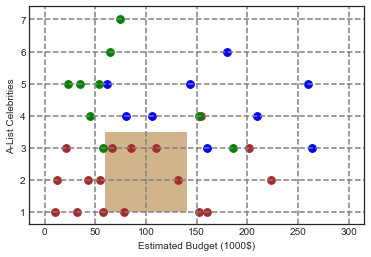

In [66]:
qrule_to_extend = quant_rules[0].copy()
qrule_to_extend.antecedent = [
    ("a-list-celebrities", Interval(2.5, 3.5, True, True)),
    ("estimated-budget", Interval(60, 140, True, True))
]





qrules_extended = rule_extender.transform_greedy([qrule_to_extend], skip_ahead=2)
#qrules_extended = rule_extender_original.transform([qrule_to_extend])
plotils.plot_quant_rules(qrules_extended)

In [60]:
np.where([True, True, False, True, True])[0]

array([0, 1, 3, 4], dtype=int64)